In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier



In [9]:
# Download historical data for Tesla from 2017 to 2023
data = yf.download("TSLA", start="2017-01-01", end="2023-12-31")

# Display the first few rows
print(data.head())


[*********************100%***********************]  1 of 1 completed

Price       Adj Close      Close       High        Low       Open     Volume
Ticker           TSLA       TSLA       TSLA       TSLA       TSLA       TSLA
Date                                                                        
2017-01-03  14.466000  14.466000  14.688667  14.064000  14.324000   88849500
2017-01-04  15.132667  15.132667  15.200000  14.287333  14.316667  168202500
2017-01-05  15.116667  15.116667  15.165333  14.796667  15.094667   88675500
2017-01-06  15.267333  15.267333  15.354000  15.030000  15.128667   82918500
2017-01-09  15.418667  15.418667  15.461333  15.200000  15.264667   59692500


In [10]:
##Creating new features
data['MA_10'] = data['Close'].rolling(window=10).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()


In [34]:
data.describe()

Price,Adj Close,Close,High,Low,Open,Volume,MA_10,MA_50,Signal
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,,,
count,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1.760000e+03,1751.000000,1711.000000,1760.000000
mean,128.150937,128.150937,131.047126,125.103957,128.186542,1.277921e+08,128.118611,128.124253,0.048864
std,113.857011,113.857011,116.500247,111.167056,113.974975,8.028250e+07,113.524667,112.170715,0.999089
min,11.931333,11.931333,12.445333,11.799333,12.073333,2.940180e+07,12.666333,14.620947,-1.000000
25%,21.119000,21.119000,21.472001,20.730167,21.079667,7.669110e+07,21.216633,21.352967,-1.000000
50%,77.609665,77.609665,78.777668,75.536667,76.815998,1.049592e+08,79.231801,81.211254,1.000000
75%,234.232506,234.232506,238.756668,228.258335,233.924999,1.491034e+08,233.532833,236.551000,1.000000
max,409.970001,409.970001,414.496674,405.666656,411.470001,9.140820e+08,383.062668,357.870532,1.000000


In [11]:
data['Signal'] = np.where(data['Close'].shift(-1) > data['Close'], 1, -1)


In [12]:
from sklearn.model_selection import train_test_split

# Define Features (X) and Target (y)
X = data[['Open', 'High', 'Low', 'Close', 'MA_10', 'MA_50']].dropna()  # Drop NaNs
y = data['Signal'][X.index]

# Split into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


In [21]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Evaluate Models
print("Logistic Regression Report:\n", classification_report(y_test, lr_pred))



Logistic Regression Report:
               precision    recall  f1-score   support

          -1       0.62      0.06      0.11       174
           1       0.50      0.96      0.66       169

    accuracy                           0.50       343
   macro avg       0.56      0.51      0.38       343
weighted avg       0.56      0.50      0.38       343



In [22]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))

Logistic Regression Accuracy: 0.5043731778425656


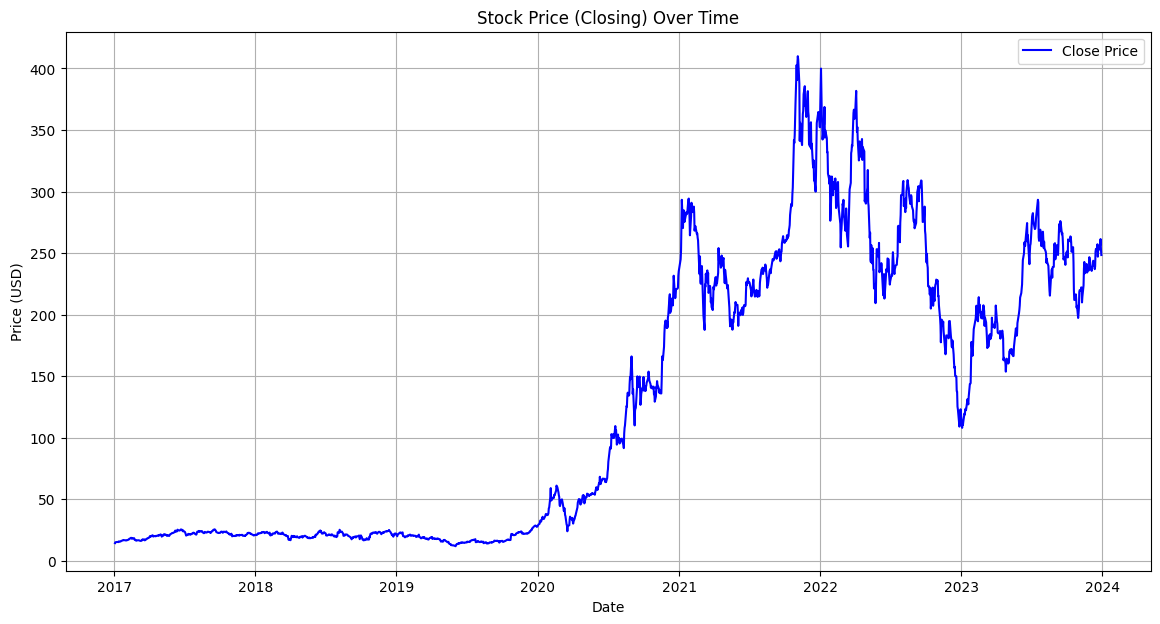

In [24]:
# Plot the closing price over time
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.title("Stock Price (Closing) Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

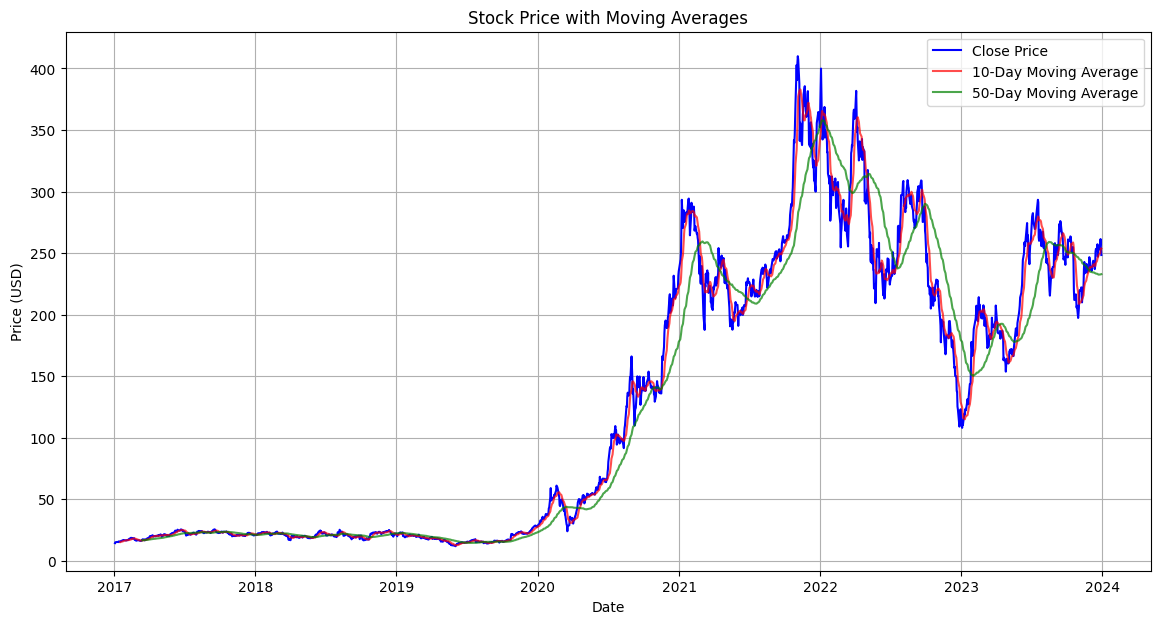

In [25]:
# Plot Closing Price with Moving Averages (10-day and 50-day)
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['MA_10'], label='10-Day Moving Average', color='red', alpha=0.7)
plt.plot(data['MA_50'], label='50-Day Moving Average', color='green', alpha=0.7)
plt.title("Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()


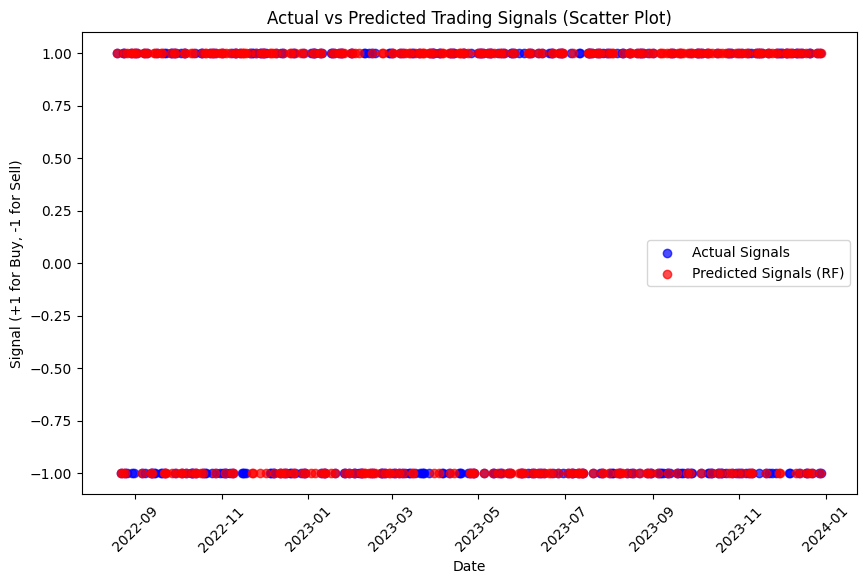

In [32]:
# Scatter plot for actual vs predicted signals
plt.figure(figsize=(10, 6))
plt.scatter(data.index[-len(y_test):], y_test, color='blue', label='Actual Signals', alpha=0.7)
plt.scatter(data.index[-len(y_test):], rf_pred, color='red', label='Predicted Signals (RF)', alpha=0.7)
plt.legend()
plt.title("Actual vs Predicted Trading Signals (Scatter Plot)")
plt.xlabel('Date')
plt.ylabel('Signal (+1 for Buy, -1 for Sell)')
plt.xticks(rotation=45)
plt.show()


In [26]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_pred = rf_model.predict(X_test)

In [27]:
# Confusion Matrix
cm = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[ 73 101]
 [ 64 105]]


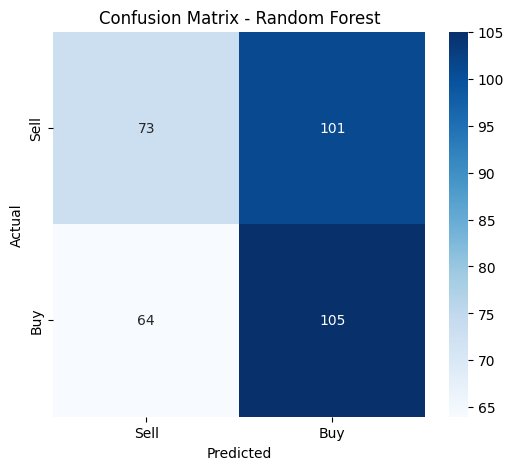

In [28]:
# Confusion Matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Sell', 'Buy'], yticklabels=['Sell', 'Buy'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [30]:
from sklearn.metrics import precision_score, f1_score

# Precision Score
precision = precision_score(y_test, rf_pred)
print("Precision Score:", precision)

# F1 Score
f1 = f1_score(y_test, rf_pred)
print("F1 Score:", f1)


Precision Score: 0.5097087378640777
F1 Score: 0.56
